![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [2]:
def condicao_parada_bissecao(a,b,xtol,niter,maxiter,ytol,f,show_intervals):
    if(show_intervals):
        if(niter >= 19):
            print(f"Current interval:[{a: .26f},{b: .26f}]\n")
        if(abs(a - b) < xtol):
            print(f"Xtol:[{a},{b}]")
        if(niter == maxiter):
            print(f"Maxiter:[{a},{b}]")
        if(np.abs( f((a+b)/2)  ) < ytol):
            print(f"Ytol:[{a},{b}]")
    return abs(a - b) < xtol or niter == maxiter or np.abs( f((a+b)/2)  ) < ytol

def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100,show_intervals=False):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    num_iter = 0
    pts = []
    #supoe fb > fa
    if(f(a) > f(b)):
        aux = b
        b = a
        a = aux
    fcalls = 2
    while(not condicao_parada_bissecao(a,b,xtol,num_iter,maxiter,ytol,f,show_intervals)):
        m = (a+b)/2
        pts.append(m)
        if(f(m) > 0):
            b = m
        else:
            a = m   
        num_iter += 1
        fcalls += 1
    pts.append((a+b)/2)
    return pts

In [3]:
def condicao_parada(f,x,xtol,ytol,step,niter,maxiter,df,show_fx=False):
    if(show_fx):
        print(f"x: {x}, f(x) : {np.abs(f(x))}, f'(x) : {np.abs(df(x))}")
    return (np.abs(f(x))<ytol) or (np.abs(step)<xtol) or (niter>maxiter)
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100,show_fx=False):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    """
    stop = False
    niter = 0
    pts = []
    pts.append(x)
    while(not stop):
        step = f(x)/df(x)
        x -= step
        stop = condicao_parada(f,x,xtol,ytol,step,niter,maxiter,df,show_fx)
        pts.append(x)
        niter += 1
    return pts     

## Derivadas numéricas

In [4]:
def df_central(f, x, h=1e-5):
    return (f(x+h) - f(x-h))/(2*h)

def ddf_central(f, x, h=1e-4):
    return (df_central(f,x+h) - df_central(f,x-h))/(2*h)

## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

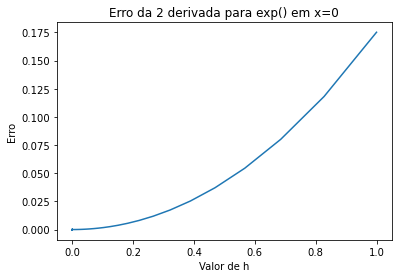

In [5]:
hs = np.logspace(-27,0,base=2, num=100)
y = [ddf_central(np.exp,0,h) for h in hs]
error = np.add(y,-1)
plt.plot(hs,error)
plt.title("Erro da 2 derivada para exp() em x=0")
plt.xlabel("Valor de h")
plt.ylabel("Erro")
ax = plt.gca()

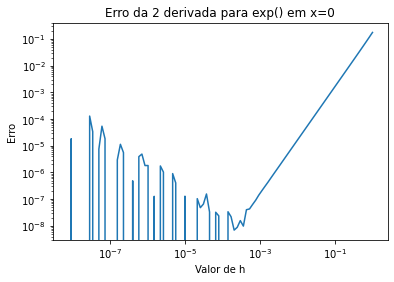

In [6]:
plt.plot(hs,error)
plt.loglog()
plt.title("Erro da 2 derivada para exp() em x=0")
plt.xlabel("Valor de h")
plt.ylabel("Erro")
ax = plt.gca()

In [7]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?

Obs: Use erros relativos!

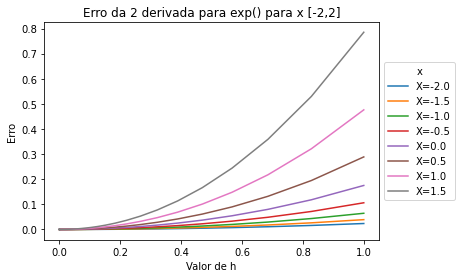

In [8]:
hs = np.logspace(-27,0,base=2, num=100)
for x in np.arange(-2,2,0.5):
    y = [ddf_central(np.exp,x,h) for h in hs]
    error = np.add(y,-np.exp(x))
    plt.plot(hs,error,label=f"X={x}")
plt.title("Erro da 2 derivada para exp() para x [-2,2]")
plt.xlabel("Valor de h")
plt.ylabel("Erro")
plt.legend(title="x", bbox_to_anchor=(1,0.5), loc="center left")
ax = plt.gca()

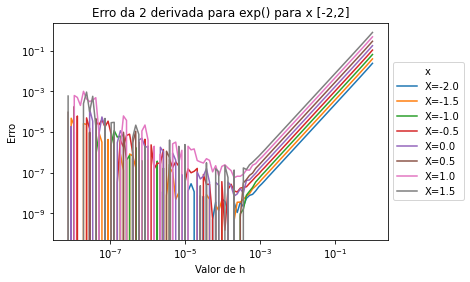

In [9]:
hs = np.logspace(-27,0,base=2, num=100)
for x in np.arange(-2,2,0.5):
    y = [ddf_central(np.exp,x,h) for h in hs]
    error = np.add(y,-np.exp(x))
    plt.plot(hs,error,label=f"X={x}")
plt.loglog()
plt.title("Erro da 2 derivada para exp() para x [-2,2]")
plt.xlabel("Valor de h")
plt.ylabel("Erro")
plt.legend(title="x", bbox_to_anchor=(1,0.5), loc="center left")
ax = plt.gca()

In [10]:
assert len(ax.lines) >= 8
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Comente.

Em primeiro lugar notamos que o erro de truncamento é predominante no intervalo hs < 1e-3. A partir desse ponto o erro de aproximação é a principal razão pelo erro estar crescendo. Nota-se ainda que conforme maior o valor de X, maior o erro de aproximação associado a ele. Além disso, o erro cresce de forma exponencial conforme maior o valor de h. Se fizermos uma análise da derivada segunda, temos que:
$
\begin{equation}
f'(x+h) = f'(x) + f''(x)h + \frac{f'''(x)h^2}{2} + \frac{f^{(4)}(x)h^3}{24} + O(h^4)\\
f'(x-h) = f'(x) - f''(x)h + \frac{f'''(x)h^2}{2} - \frac{f^{(4)}(x)h^3}{24} + O(h^4)\\
ddf(x,h) = \frac{f'(x+h) - f'(x-h)}{2h} = \frac{2f''(x)h + 2\frac{f^{(4)}(x)h^3}{24}}{2h} = f''(x) + \frac{f^{(4)}(x)h^2}{24}
\end{equation}$
O primeiro termo é a segunda derivada propriamente dita, enquanto o segundo termo é o principal fator do erro associado. Assim, vemos que para um mesmo "h", o erro em $x_0$ e $x_1$ é tal que $\frac{exp(x_0)h^2}{24} < \frac{exp(x_1)h^2}{24} \iff x_0 < x_1$. Por outro lado, para um mesmo valor de "x" temos que o erro cresce quadraticamente com o valor de "h".

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [11]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [12]:
def g1(x):
    return np.exp(x) - 2

def g2(x):
    return df_central(f, x, h=1e-3)

def g3(x):
    return df_central(f, x, h=1e-5)

In [13]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

Text(0, 0.5, 'y')

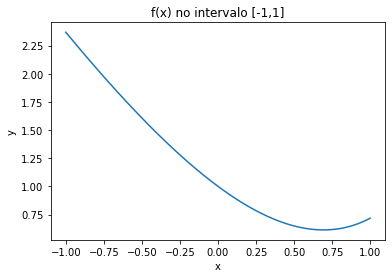

In [14]:
ax = plt.gca()
x = np.arange(-1,1,0.001)
y = f(x)
plt.plot(x,y)
plt.title("f(x) no intervalo [-1,1]")
plt.xlabel("x")
plt.ylabel("y")

In [15]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

Escolheria o intervalo [0.5,1.0] pois nesse intervalo ocorre a inversão do sinal da derivada, logo, de acordo com o Teorema de Rolle, em algum ponto nesse intervalo ela deve assumir o valor 0 dado que a função é contínua e derivável. Além disso, nesses pontos temos que sign(f'(0.5)) = -sign(f'(1.0)), condição necessária para podermos executar a bisseção.

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

----------g1---------
Current interval:[ 0.69314670562744140625000000, 0.69314765930175781250000000]

Ytol:[0.6931467056274414,0.6931476593017578]
----------g2---------
Current interval:[ 0.69314670562744140625000000, 0.69314765930175781250000000]

Current interval:[ 0.69314670562744140625000000, 0.69314718246459960937500000]

Current interval:[ 0.69314694404602050781250000, 0.69314718246459960937500000]

Current interval:[ 0.69314694404602050781250000, 0.69314706325531005859375000]

Current interval:[ 0.69314700365066528320312500, 0.69314706325531005859375000]

Current interval:[ 0.69314700365066528320312500, 0.69314703345298767089843750]

Ytol:[0.6931470036506653,0.6931470334529877]
----------g3---------
Current interval:[ 0.69314670562744140625000000, 0.69314765930175781250000000]

Ytol:[0.6931467056274414,0.6931476593017578]


[]

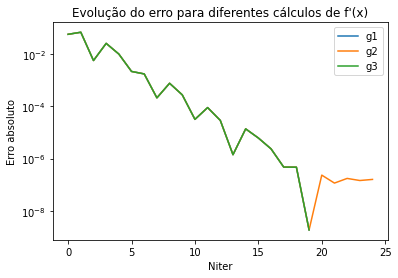

In [16]:
print("----------g1---------")
pts_g1 = bissecao_pts(g1, 0.5, 1.0,show_intervals=True)
print("----------g2---------")
pts_g2 = bissecao_pts(g2, 0.5, 1.0,show_intervals=True)
print("----------g3---------")
pts_g3 = bissecao_pts(g3, 0.5, 1.0,show_intervals=True)
error_g1 = np.add(pts_g1,-np.log(2))
error_g2 = np.add(pts_g2,-np.log(2))
error_g3 = np.add(pts_g3,-np.log(2))
ax = plt.gca()
plt.plot(np.arange(len(pts_g1)),np.abs(error_g1),label="g1")
plt.plot(np.arange(len(pts_g2)),np.abs(error_g2),label="g2")
plt.plot(np.arange(len(pts_g3)),np.abs(error_g3),label="g3")
plt.legend()
plt.title("Evolução do erro para diferentes cálculos de f'(x)")
plt.xlabel("Niter")
plt.ylabel("Erro absoluto")
plt.semilogy()

In [17]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

Numa primeira observação, vemos que a curva dos erros é mais ou menos igual para g1, g2 e g3. No entanto, para g2 temos não apenas mais iterações, como também temos um acréscimo no erro após a 19ª iteração. Fazendo o print do intervalo [a,b] para a 19ª iteração, vemos que os valores de "a" e "b" são os mesmos para cada função g1, g2 e g3. No entanto, se calculamos o erro em y, $erro_y = g_i(\frac{a+b}{2}) i \in [1,2,3]$, vemos que esse valor é diferente para cada um dos casos. Tirando g1, os demais métodos para calcular a derivada possuem um erro associado. Vamos analisá-lo analiticamente:
$
\begin{equation}
f'(x,h) = \frac{f(x+h) - f(x-h)}{2h}\\
f(x+h) = f(x) + f'(x)h + \frac{f''(x)h^2}{2} + \frac{f'''(x)h^3}{6} + O(4)\\
f(x-h) = f(x) - f'(x)h + \frac{f''(x)h^2}{2} - \frac{f'''(x)h^3}{6} + O(4)\\
Substituindo:\\
f'(x,h) = f'(x) + \frac{f'''(x)h^2}{6}
\end{equation}
$
O primeiro termo é a derivada propriamente dita, enquanto o segundo é o erro associado. Com isso, vemos que o erro associado ao cálculo da derivada é proporcional ao valor de $h^2$. Como para g3 o valor de "h" é 1e-5, e $f'''(log(2)) = 2$, o erro associado é na ordem 1e-10, e portanto passa no teste erro em $y < 1e-8$. Contudo, para g2 o valor de "h" é na ordem de 1e-3, o que implica em um erro na ordem de 1e-6, fazendo com que ele não passe no teste. 
Vamos analisar agora por que o erro aumenta de uma iteração para outra. Fazendo o print para as iterações, vemos que $m_{19} = (a_{19} + b_{19})/2$ está mais próximo da raiz log(2) para a 19ª iteração. No entanto, $m_{20} = (a_{19} + b_{20})/2$ está mais distante, apesar do intervalo estar bem menor. Isso ocorre pois apenas o extremo "b" do intervalo está próximo da raiz. Com a diminuição do intervalo, a condição do xtol é atendida, impedindo que o erro se reduza mais.

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [18]:
def h1(x):
    return np.exp(x)
def h2(x):
    return ddf_central(f,x)

In [19]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

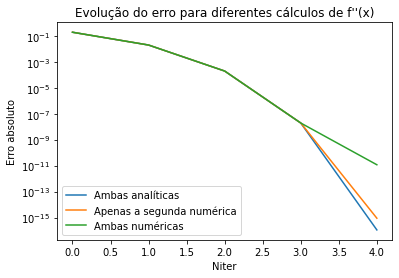

In [20]:
pts_aa = newton_pts(g1, h1, 0.5)
pts_an = newton_pts(g1, h2, 0.5)
pts_nn = newton_pts(g3, h2, 0.5)
error_aa = np.add(pts_aa,-np.log(2))
error_an = np.add(pts_an,-np.log(2))
error_nn = np.add(pts_nn,-np.log(2))
ax = plt.gca()
plt.plot(np.arange(len(pts_aa)),np.abs(error_aa),label="Ambas analíticas")
plt.plot(np.arange(len(pts_an)),np.abs(error_an),label="Apenas a segunda numérica")
plt.plot(np.arange(len(pts_nn)),np.abs(error_nn),label="Ambas numéricas")
plt.legend()
plt.title("Evolução do erro para diferentes cálculos de f''(x)")
plt.xlabel("Niter")
plt.ylabel("Erro absoluto")
plt.semilogy()
ax = plt.gca()

In [21]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

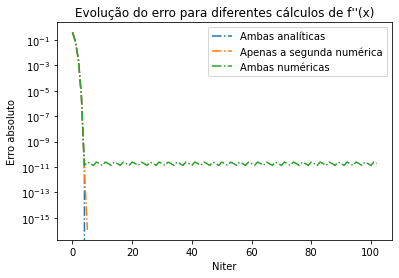

In [22]:
pts_aa = newton_pts(g1, h1, 1.1, 1e-15, 1e-15)
#print("------------------Ambas Analíticas-----------------")
pts_an = newton_pts(g1, h2, 1.1, 1e-15, 1e-15)
#print("------------------Apenas Segunda Numérica-----------------")
pts_nn = newton_pts(g3, h2, 1.1, 1e-15, 1e-15,show_fx=False)
#print("------------------Ambas Numéricas-----------------")
error_aa = np.add(pts_aa,-np.log(2))
error_an = np.add(pts_an,-np.log(2))
error_nn = np.add(pts_nn,-np.log(2))
plt.plot(np.arange(len(pts_aa)),np.abs(error_aa),label="Ambas analíticas",linestyle='dashdot')
plt.plot(np.arange(len(pts_an)),np.abs(error_an),label="Apenas a segunda numérica",linestyle='dashdot')
plt.plot(np.arange(len(pts_nn)),np.abs(error_nn),label="Ambas numéricas",linestyle='dashdot')
plt.legend()
plt.title("Evolução do erro para diferentes cálculos de f''(x)")
plt.xlabel("Niter")
plt.ylabel("Erro absoluto")
plt.semilogy()
ax = plt.gca()

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

Observamos pelo primeiro gráfico que a partir da 3ª iteração o erro cai com diferentes taxas, tal que o coeficiente de decaimento obdece a relação Ambas Numéricas < Apenas a Segunda Numérica < Ambas Analíticas. Se expandirmos a série de Taylor para a primeira e segunda derivadas temos que:
$
\begin{equation}
f'(x,h) = f'(x) + \frac{f'''(x)h^2}{6}\\
f''(x,h) =  f''(x) + \frac{f''''(x)h^2}{24}
\end{equation}
$
Dessa forma, o cálculo do passo $step = \frac{f'(x)}{f''(x)}$ será diferente para cada um dos casos acima. Para a função em questão temos que:
<ul>
    <li> Ambas analíticas: $step = \frac{exp(x) - 2}{exp(x)} $
    <li> Aapenas a segunda numérica: $step = \frac{exp(x) - 2}{exp(x) + exp(x)h^2/24} $
    <li> Ambas numéricas: $step = \frac{(exp(x) - 2) + exp(x).h^2/6}{exp(x) + exp(x)h^2/24}$
</ul>
Seguindo a ordem da relação acima, vemos que o erro decai mais lentamente no caso em que apenas a segunda derivada é numérica se comparada com o caso em que todas são analíticas. O erro associado é necessariamente positivo pois: 
$exp(x)h^2/24 \geq 0 \\ \forall x,h \in R$ Assim o denominador é maior por conta do erro associado, fazendo com que tal fenômeno ocorra. Análogamente, o decaimento é ainda menor no caso em que ambas derivadas são numéricas para o caso em que apenas a segunda é numérica. Isso se deve ao fato de que o numerador tem um erro a mais sendo adicionado que é maior do que o erro da derivada segunda: $exp(x).h^2/6 \geq exp(x)h^2/24 \\ \forall x,h \in R$
Apesar dessas diferenças no decaimento do erro existir desde a 1ª iteração, ela só se torna visível quando chegamos próximos suficientes da raiz, de modo que $exp(x) - 2 \approx 0$. Logo, é nesse caso em que a diferença nos numeradores e denominadores se fazem importantes.
<p> Já para o segundo gráfico, vemos que apenas o caso que usa ambas derivadas numéricas não converge. Fazendo o print de x, f(x) e f'(x), vemos que x entra em ciclo e valores de f'(x) se repetem 2 vezes seguidas na sequência. A razão por trás disso, provavelmente, é o erro de truncamento ao qual esse caso está mais sujeito (mais somas no numerador causando cancelamento castastrófico).

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

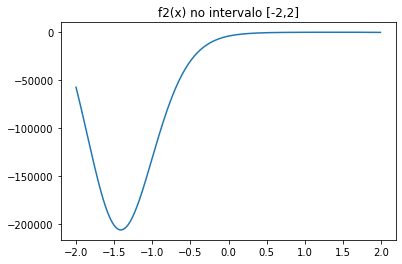

In [23]:
def f2(x):
    return np.exp(np.power(x,2) - 2*x + 1) - np.power(2,(np.power(x,3) - 6*x + 12))
def df2(x):
    return (2*x - 2)*np.exp(np.power(x,2) - 2*x + 1) - (3*np.power(x,2) - 6)*np.log(2)*np.power(2,(np.power(x,3) - 6*x + 12))
x = np.arange(-2,2,0.01)
y = f2(x)
plt.plot(x,y)
plt.title("f2(x) no intervalo [-2,2]")
ax = plt.gca()

In [24]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [25]:
pts_df2 = np.array(bissecao_pts(df2, -1.5, -1.0))

Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [26]:
y = f2(np.array(pts_df2))
pts_df2[(y <= np.min(y)).nonzero()][0]

-1.4128724038600922

Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [27]:
pts_df2[(y <= np.min(y)).nonzero()] - pts_df2[-1]

array([-3.7252903e-09])

Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

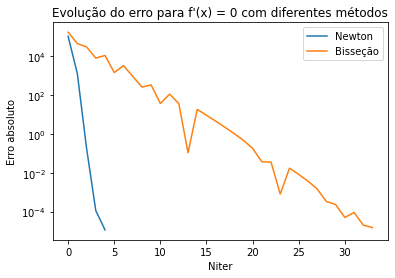

In [28]:
def ddf2(x):
    return ddf_central(f2, x, h=1e-8)
def df2_num(x):
    return df_central(f2, x, h=1e-5)

tol = 1e-10
pts_newton = newton_pts(df2_num, ddf2, -1.5,xtol=tol,ytol=tol)
pts_biss = bissecao_pts(df2_num, -1.5,-1.0,xtol=tol,ytol=tol,show_intervals=False)
error_newton = df2(np.array(pts_newton))
error_biss = df2(np.array(pts_biss))
ax = plt.gca()
plt.plot(np.arange(len(pts_newton)),np.abs(error_newton),label="Newton")
plt.plot(np.arange(len(pts_biss)),np.abs(error_biss),label="Bisseção")
plt.legend()
plt.title("Evolução do erro para f'(x) = 0 com diferentes métodos")
plt.xlabel("Niter")
plt.ylabel("Erro absoluto")
plt.semilogy()
ax = plt.gca()

Text(0.5, 1.0, 'Razão de convergencia')

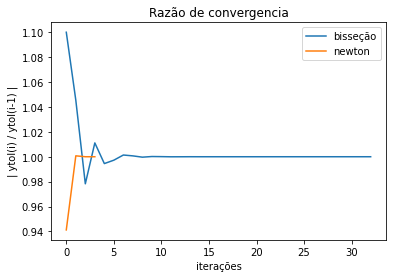

In [29]:
ax = plt.gca()
r_f = [np.abs(pts_biss[i]/pts_biss[i-1]) for i in range(1,len(pts_biss))]
r_g = [np.abs(pts_newton[i]/pts_newton[i-1]) for i in range(1,len(pts_newton))]
ax.plot(np.arange(len(pts_biss) - 1), r_f, label="bisseção")
ax.plot(np.arange(len(pts_newton) - 1), r_g, label="newton")
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("| ytol(i) / ytol(i-1) |")
ax.set_title("Razão de convergencia")

In [30]:
pts_biss[-1] - pts_newton[-1]

2.9762858844151197e-12

Vemos que o erro em y decai bem mais rápido no caso do algoritmo de Newton. Vale notar também que ambos os 
algoritmos tem a razão de convergência tendendo a 1, no entanto para o caso de Newton os primeiros pontos parecem ter uma razão de convergência < 1, enquanto para a bisseção acontece o oposto. Essa diferença é relevante pois o decaimento inicial é um pouco mais rápido no caso de Newton, o que explica em parte sua convergência ser mais rápida.